# Input: Interpolating Autoencoder

There are some different to get the corrupted input we need to train our interpolating autoencoder. In this notebook, I will explore three different options:

1. Averaging rows
2. Sample rows
3. Weighted averaging

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
cmap = plt.cm.gray

from process import Process

In [3]:
process = Process()
img_input,img_labels = process.read_in_images(["train-input"],["train-labels"])

In [4]:
def standardize(img_stack):
    for n in xrange(img_stack.shape[0]):
        img_stack[n] = (img_stack[n]-img_stack[n].mean())/img_stack[n].std()
    return img_stack

def expand_row(row,stride=6):
    row_expanded = np.zeros((stride,row.shape[0]))
    for n in xrange(stride):
        row_expanded[n] = row
    return row_expanded

def expand(img,stride=6):
    img_expanded = np.zeros((img.shape[0]*stride,img.shape[1]))
    
    for n in xrange(img.shape[0]):
        img_expanded[n*stride:(n+1)*stride] = expand_row(img[n])
    return img_expanded

In [5]:
img_input = standardize(img_input)

In [6]:
img = img_input[0]

## Averaging

In [7]:
def average(img_input,stride=6):
    img_avg = np.zeros((int(np.floor(img.shape[0]/6.)),img.shape[1]))
    for n in xrange(img_avg.shape[0]):
        img_avg[n] = img[n*stride:(n+1)*stride].mean(axis=0)
    return img_avg

In [8]:
img_avg = average(img)

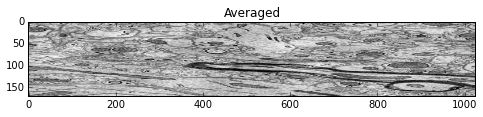

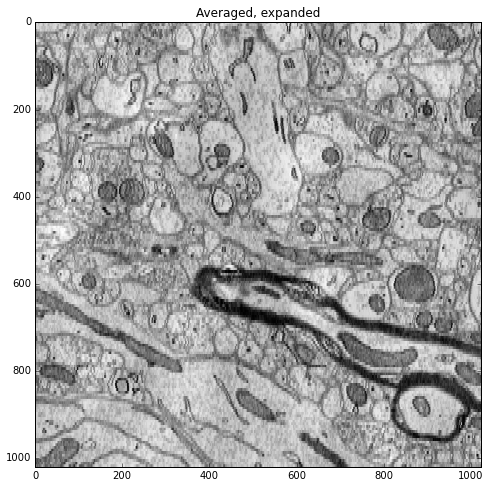

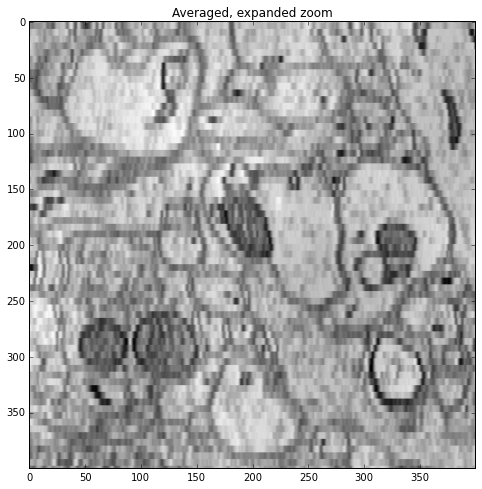

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(img_avg,cmap=cmap)
plt.title("Averaged")
plt.figure(figsize=(8,8))
plt.imshow(expand(img_avg),cmap=cmap)
plt.title("Averaged, expanded")
plt.figure(figsize=(8,8))
plt.imshow(expand(img_avg)[100:500,100:500],cmap=cmap)
plt.title("Averaged, expanded zoom")

## Sample rows

In [10]:
def sample(img_input,stride=6,sample_row=2):
    img_avg = np.zeros((int(np.floor(img.shape[0]/6.)),img.shape[1]))
    for n in xrange(img_avg.shape[0]):
        img_avg[n] = img[n*stride+sample_row]
    return img_avg

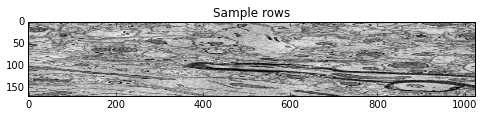

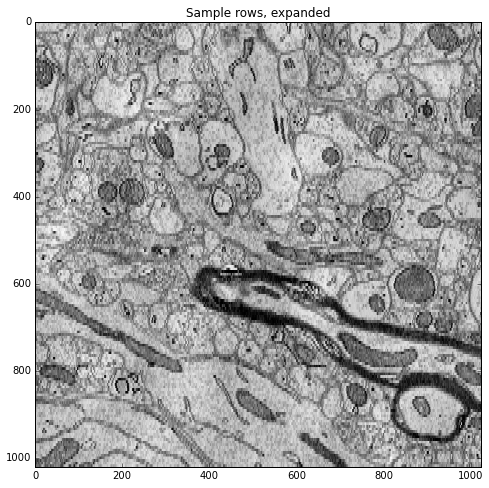

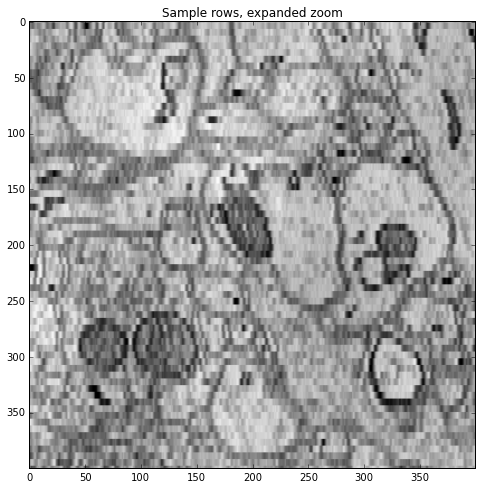

In [11]:
plt.figure(figsize=(8,8))
plt.imshow(sample(img),cmap=cmap)
plt.title("Sample rows")
plt.figure(figsize=(8,8))
plt.imshow(expand(sample(img)),cmap=cmap)
plt.title("Sample rows, expanded")
plt.figure(figsize=(8,8))
plt.imshow(expand(sample(img))[100:500,100:500],cmap=cmap)
plt.title("Sample rows, expanded zoom")

## Weighted Averaging - Gaussian

In [12]:
def fun_gaussian(stride,omega=1):
    x = np.arange(stride)
    ga = np.exp(-((x-x.mean())**2)/(2*omega))
    ga /= ga.sum()
    return ga

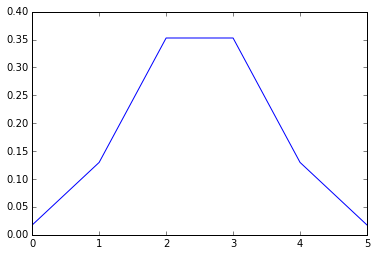

In [13]:
gaussian_kernel = fun_gaussian(stride=6,omega=1)
plt.plot(gaussian_kernel)

In [14]:
def gaussian_row(rows,kernel):
    out_row = np.zeros(rows.shape[1])
    for n in xrange(rows.shape[0]):
        out_row += rows[n]*kernel[n]
    return out_row

def gaussian_avg(img,kernel,stride=6):
    img_avg = np.zeros((int(np.floor(img.shape[0]/6.)),img.shape[1]))
    for n in xrange(img_avg.shape[0]):
        img_avg[n] = gaussian_row(img[n*stride:(n+1)*stride],kernel)
    return img_avg

In [15]:
img_gaussian = gaussian_avg(img,gaussian_kernel)

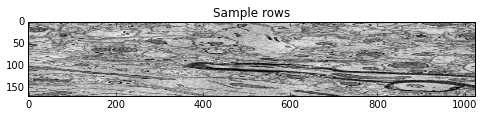

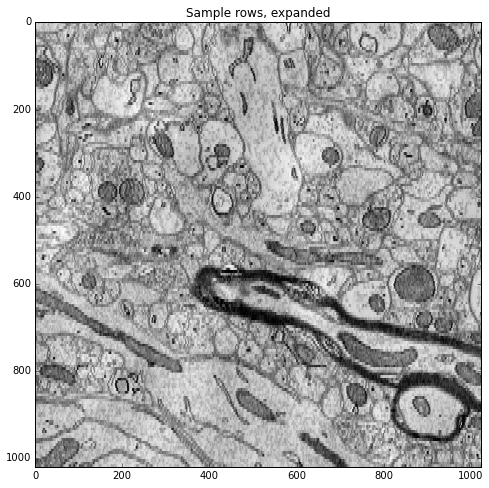

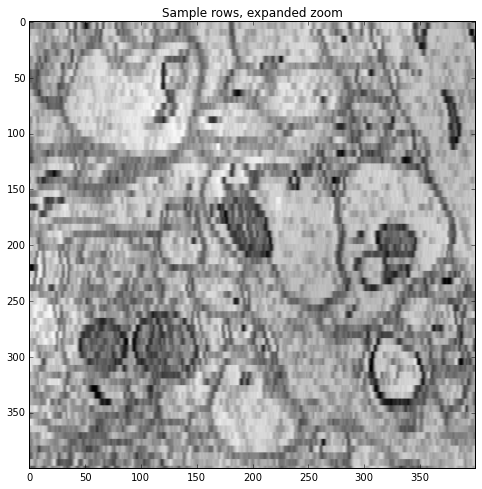

In [16]:
plt.figure(figsize=(8,8))
plt.imshow(sample(img_gaussian),cmap=cmap)
plt.title("Sample rows")
plt.figure(figsize=(8,8))
plt.imshow(expand(img_gaussian),cmap=cmap)
plt.title("Sample rows, expanded")
plt.figure(figsize=(8,8))
plt.imshow(expand(img_gaussian)[100:500,100:500],cmap=cmap)
plt.title("Sample rows, expanded zoom")

## $L_2$ error: (corrupted/original image)

In [17]:
print "Averaging:",np.mean(img[:1020]-expand(img_avg))
print "Sample rows:",np.mean(img[:1020]-expand(sample(img)))
print "Weighted average:",np.mean(img[:1020]-expand(img_gaussian))

Averaging: 6.47970239556e-19
Sample rows: 0.000455675348699
Weighted average: 0.000109300670447


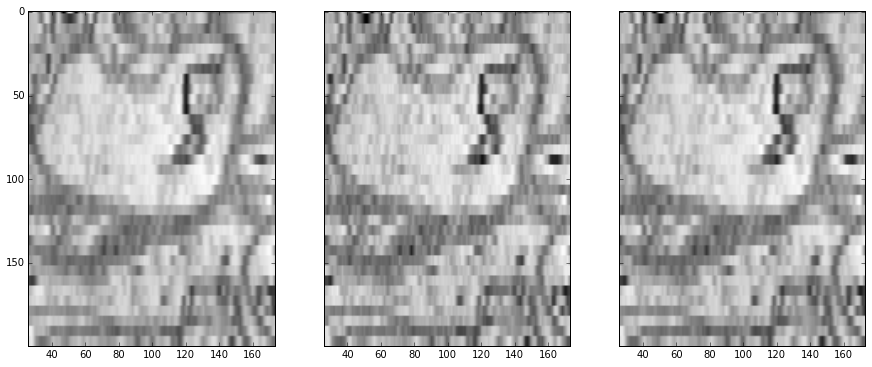

In [33]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,6))
ax1.imshow(expand(img_avg)[100:300,100:300],cmap=cmap)
ax2.imshow(expand(sample(img))[100:300,100:300],cmap=cmap)
ax3.imshow(expand(img_gaussian)[100:300,100:300],cmap=cmap)

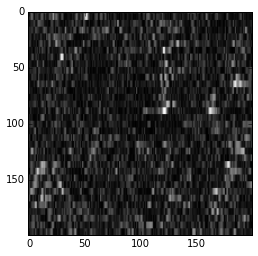

In [35]:
plt.imshow(np.abs(expand(img_avg)[100:300,100:300]-expand(sample(img))[100:300,100:300]),cmap=cmap)